In [ ]:
# Stochastic Discount Factor

# Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:


# Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero 
# (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

# Simulate ε with (at least) 104 random draws from standard normal distribution,
# and simulate ν with (at least) 104 random draws from standard uniform distribution.

# Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:


# Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). 
#(You can reuse the same simulated distribution of consumption growth for all values of γ)

# Calculate the mean (μM) and standard deviation (σM) of pricing kernel for each value of γ, 
# and plot the volatility ratio (σM/μM) on the vertical axis vs γ on the horizontal axis.

# Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using mathematical equations or formulas) 
# the economic significance of this result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_c = 10000
consumption_growth = np.zeros(num_c)
for i in range(num_c):
    mu, sigma = 0,1
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)







In [24]:
prob_nu

0.34073008717327136

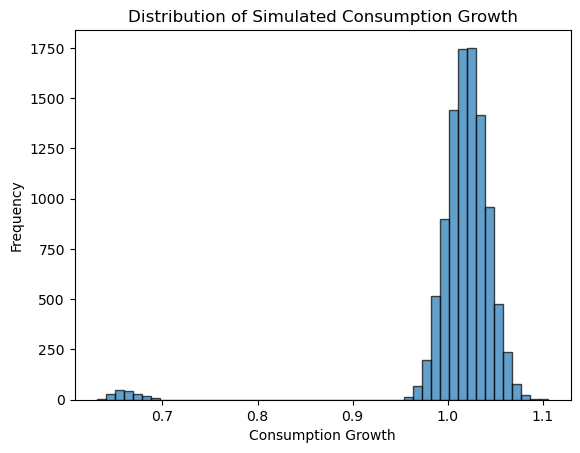

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_c = 10000

# Parameters
mu = 0  # Mean for the normal distribution
sigma = 1  # Standard deviation for the normal distribution

# Simulate epsilon (standard normal distribution)
epsilon = np.random.standard_normal(num_c)

# Simulate nu (rare disaster shock)
prob_nu = np.random.uniform(0, 1, num_c)
nu = np.where(prob_nu < 0.017, np.log(0.65), 0)

# Simulate consumption growth
consumption_growth = np.exp(0.02 + 0.02 * epsilon + nu)

# Optional: plot histogram of consumption growth to visualize the distribution
plt.hist(consumption_growth, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Simulated Consumption Growth')
plt.xlabel('Consumption Growth')
plt.ylabel('Frequency')
plt.show()


Sample of Simulated Data:
    Epsilon  Nu (Rare Disaster Shock)  Consumption Growth
0 -1.273222                       0.0            0.994550
1  0.889258                       0.0            1.038508
2  0.700957                       0.0            1.034604
3 -0.706123                       0.0            1.005895
4  0.290987                       0.0            1.026156
5 -0.754585                       0.0            1.004920
6 -0.746952                       0.0            1.005074
7  1.119129                       0.0            1.043294
8  1.664083                       0.0            1.054727
9  0.416655                       0.0            1.028738


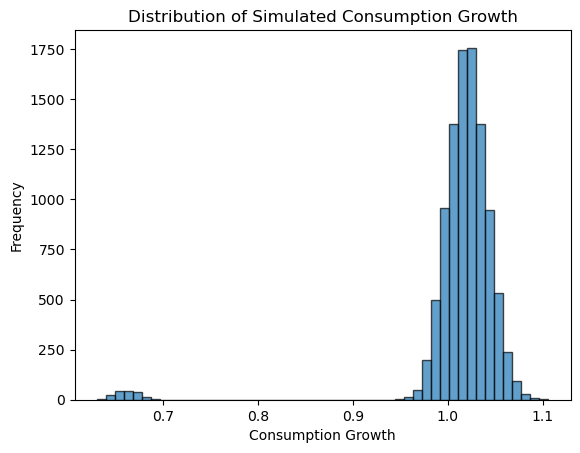

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of simulations
num_c = 10000

# Parameters for normal distribution
mu = 0  
sigma = 1  

# Simulate epsilon (standard normal distribution)
epsilon = np.random.standard_normal(num_c)

# Simulate nu (rare disaster shock)
prob_nu = np.random.uniform(0, 1, num_c)
nu = np.where(prob_nu < 0.017, np.log(0.65), 0)

# Simulate consumption growth
consumption_growth = np.exp(0.02 + 0.02 * epsilon + nu)

# Create a DataFrame to show the results
data = pd.DataFrame({
    'Epsilon': epsilon,
    'Nu (Rare Disaster Shock)': nu,
    'Consumption Growth': consumption_growth
})

# Display the first 10 rows of the table as a sample
print("Sample of Simulated Data:")
print(data.head(10))

# Optional: Plot histogram of consumption growth to visualize the distribution
plt.hist(consumption_growth, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Simulated Consumption Growth')
plt.xlabel('Consumption Growth')
plt.ylabel('Frequency')
plt.show()


In [7]:
consumption_growth

array([1.02646957, 1.00146016, 1.01834363, ..., 1.02329531, 1.03392568,
       1.01551147])

In [9]:
'''---Part 1:Hansen-Jagannathon Bound---'''
num_g = 201
delta = 0.99
gamma1 = np.linspace(1,4,num_g)
HJ_bound = np.zeros(num_g)
for i in range(num_g):
    HJ_bound[i] = np.std(delta*consumption_growth**(-gamma1[i]))/np.mean(delta*consumption_growth**(-gamma1[i]))
SM_idx = np.min(np.argwhere(HJ_bound>0.4))
SM_value = HJ_bound[np.min(np.argwhere(HJ_bound >0.4))]
gamma1_ns, HJ_bound_ns = gamma1[:SM_idx], HJ_bound[:SM_idx]
gamma1_s, HJ_bound_s = gamma1[SM_idx:], HJ_bound[SM_idx:]

In [3]:
import numpy as np
import pandas as pd

# Given parameters
num_g = 201
delta = 0.99
gamma1 = np.linspace(1, 4, num_g)

# Hansen-Jagannathan Bound calculation
HJ_bound = np.zeros(num_g)
for i in range(num_g):
    HJ_bound[i] = np.std(delta * consumption_growth**(-gamma1[i])) / np.mean(delta * consumption_growth**(-gamma1[i]))

# Find the smallest index where HJ bound exceeds 0.4
SM_idx = np.min(np.argwhere(HJ_bound > 0.4))
SM_value = HJ_bound[SM_idx]

# Split data into parts before and after the threshold
gamma1_ns, HJ_bound_ns = gamma1[:SM_idx], HJ_bound[:SM_idx]
gamma1_s, HJ_bound_s = gamma1[SM_idx:], HJ_bound[SM_idx:]

# Create a DataFrame to display the outputs
HJ_table = pd.DataFrame({
    'Gamma (γ)': gamma1,
    'HJ Bound (σM / μM)': HJ_bound,
    'Exceeds 0.4 Threshold': HJ_bound > 0.4
})

# Display the first 10 rows of the table as a sample
print("Sample of Hansen-Jagannathan Bound Calculations:")
print(HJ_table.head(10))

# Display the table entries where the threshold is exceeded
print("\nEntries where HJ Bound exceeds 0.4:")
print(HJ_table[HJ_table['Exceeds 0.4 Threshold']].head(10))


Sample of Hansen-Jagannathan Bound Calculations:
   Gamma (γ)  HJ Bound (σM / μM)  Exceeds 0.4 Threshold
0      1.000            0.074032                  False
1      1.015            0.075373                  False
2      1.030            0.076722                  False
3      1.045            0.078079                  False
4      1.060            0.079443                  False
5      1.075            0.080816                  False
6      1.090            0.082197                  False
7      1.105            0.083585                  False
8      1.120            0.084982                  False
9      1.135            0.086387                  False

Entries where HJ Bound exceeds 0.4:
     Gamma (γ)  HJ Bound (σM / μM)  Exceeds 0.4 Threshold
152      3.280            0.400473                   True
153      3.295            0.403697                   True
154      3.310            0.406940                   True
155      3.325            0.410200                   True
156     

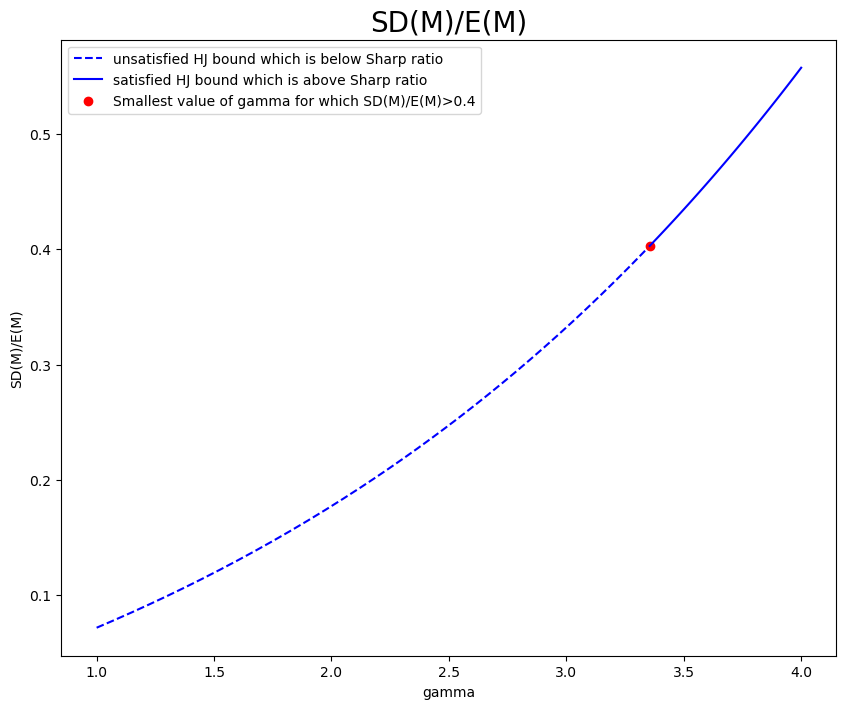

In [5]:
fig,ax1 = plt.subplots(figsize=(10,8))
ax1.plot(gamma1_ns,HJ_bound_ns,c='b',ls='--',label='unsatisfied HJ bound which is below Sharp ratio')
ax1.plot(gamma1_s,HJ_bound_s, c='b',label='satisfied HJ bound which is above Sharp ratio')
plt.scatter(gamma1[SM_idx],SM_value,c='r',label='Smallest value of gamma for which SD(M)/E(M)>0.4')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.title('SD(M)/E(M)',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Hansen-Jagannathon Bound')

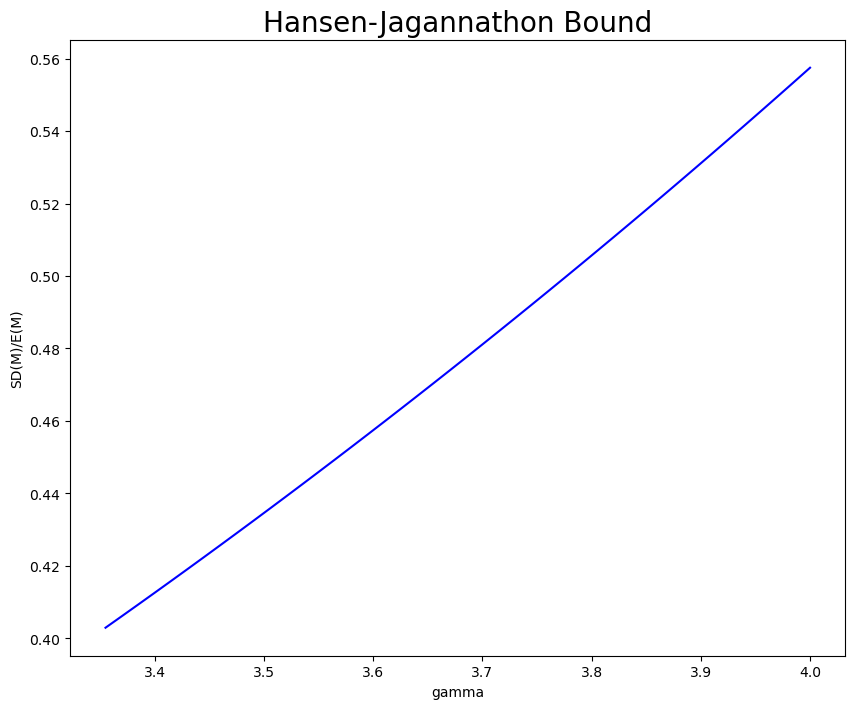

In [7]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(gamma1_s,HJ_bound_s,c='b')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.title('Hansen-Jagannathon Bound',fontsize=20)

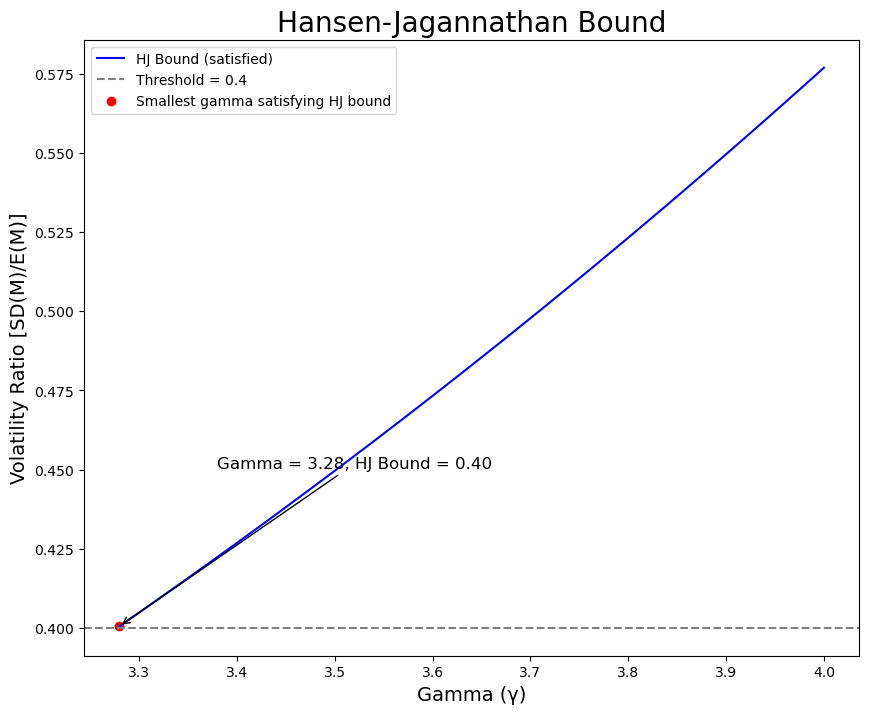

In [25]:
import matplotlib.pyplot as plt

# Assuming gamma1_s, HJ_bound_s, SM_idx, and SM_value are already defined from prior calculations
# SM_idx is the index of the smallest gamma that satisfies the threshold, and SM_value is its HJ bound value

fig, ax = plt.subplots(figsize=(10, 8))

# Plot HJ bound for gamma values that satisfy the threshold
ax.plot(gamma1_s, HJ_bound_s, color='b', label='HJ Bound (satisfied)')

# Add a horizontal line at 0.4 to indicate the threshold
ax.axhline(y=0.4, color='grey', linestyle='--', label='Threshold = 0.4')

# Mark the smallest gamma where SD(M)/E(M) > 0.4
ax.scatter(gamma1_s[0], HJ_bound_s[0], color='r', label='Smallest gamma satisfying HJ bound')

# Add an annotation pointing to the smallest gamma point
ax.annotate(
    f'Gamma = {gamma1_s[0]:.2f}, HJ Bound = {HJ_bound_s[0]:.2f}',
    xy=(gamma1_s[0], HJ_bound_s[0]),
    xytext=(gamma1_s[0] + 0.1, HJ_bound_s[0] + 0.05),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=12
)

# Labels and title
plt.xlabel('Gamma (γ)', fontsize=14)
plt.ylabel('Volatility Ratio [SD(M)/E(M)]', fontsize=14)
plt.title('Hansen-Jagannathan Bound', fontsize=20)
plt.legend(loc='upper left')

# Show plot
plt.show()


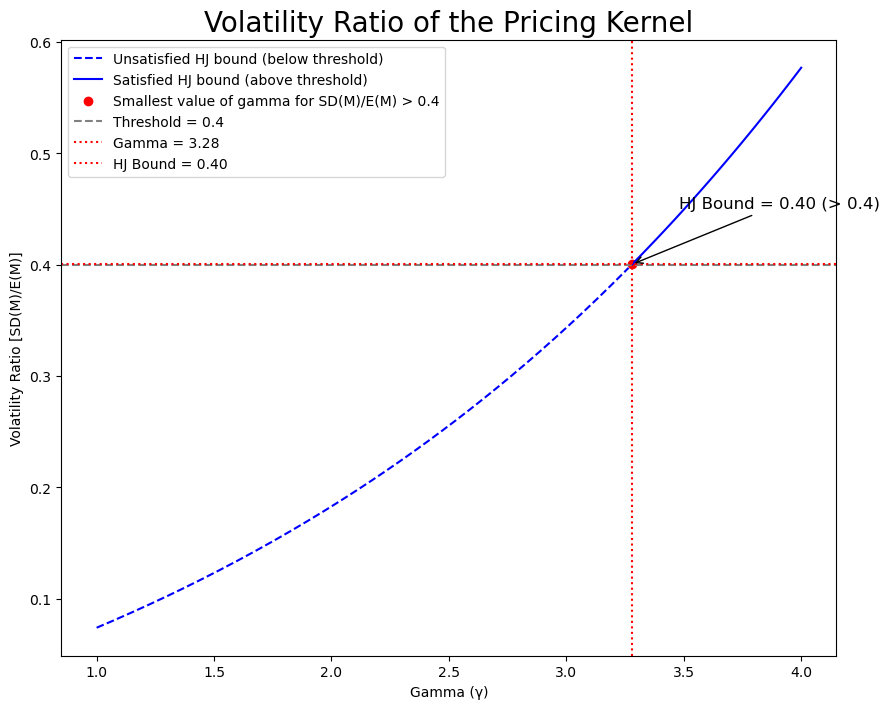

In [23]:
import matplotlib.pyplot as plt

# Assuming gamma1, HJ_bound, SM_idx, SM_value, gamma1_ns, HJ_bound_ns, gamma1_s, and HJ_bound_s are already defined

fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot sections below and above the 0.4 threshold
ax1.plot(gamma1_ns, HJ_bound_ns, color='b', linestyle='--', label='Unsatisfied HJ bound (below threshold)')
ax1.plot(gamma1_s, HJ_bound_s, color='b', label='Satisfied HJ bound (above threshold)')

# Mark the smallest gamma where SD(M)/E(M) > 0.4
ax1.scatter(gamma1[SM_idx], SM_value, color='r', label='Smallest value of gamma for SD(M)/E(M) > 0.4')

# Add horizontal line at 0.4 to indicate threshold
ax1.axhline(y=0.4, color='grey', linestyle='--', label='Threshold = 0.4')

# Add vertical and horizontal lines at the smallest gamma value and HJ bound
ax1.axvline(x=gamma1[SM_idx], color='r', linestyle=':', label=f'Gamma = {gamma1[SM_idx]:.2f}')
ax1.axhline(y=SM_value, color='r', linestyle=':', label=f'HJ Bound = {SM_value:.2f}')

# Add an arrow and text showing that HJ bound exceeds 0.4
ax1.annotate(
    f'HJ Bound = {SM_value:.2f} (> 0.4)', 
    xy=(gamma1[SM_idx], SM_value), 
    xytext=(gamma1[SM_idx] + 0.2, SM_value + 0.05),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=12,
    color='black'
)

# Labels and title
plt.xlabel('Gamma (γ)')
plt.ylabel('Volatility Ratio [SD(M)/E(M)]')
plt.title('Volatility Ratio of the Pricing Kernel', fontsize=20)
plt.legend(loc='upper left')

# Show plot
plt.show()



In [7]:
import pandas as pd

# Create a DataFrame with gamma values, HJ bounds, and threshold satisfaction status
HJ_table = pd.DataFrame({
    'Gamma (γ)': gamma1,
    'HJ Bound (σM / μM)': HJ_bound,
    'Exceeds Threshold (0.4)': HJ_bound > 0.4
})

# Identify the smallest gamma that satisfies the HJ bound
smallest_satisfied_gamma = gamma1[SM_idx]
smallest_satisfied_bound = HJ_bound[SM_idx]

# Highlight the smallest gamma where HJ Bound > 0.4
HJ_table['Highlight'] = HJ_table['Gamma (γ)'] == smallest_satisfied_gamma

# Display the results table, highlighting the threshold-crossing row
print("Hansen-Jagannathan Bound Results Table:")
print(HJ_table.head(10))  # Display the first 10 rows as a sample
print("\nSmallest Gamma satisfying the HJ bound (0.4):")
print(HJ_table[HJ_table['Highlight']].to_string(index=False))


Hansen-Jagannathan Bound Results Table:
   Gamma (γ)  HJ Bound (σM / μM)  Exceeds Threshold (0.4)  Highlight
0      1.000            0.074032                    False      False
1      1.015            0.075373                    False      False
2      1.030            0.076722                    False      False
3      1.045            0.078079                    False      False
4      1.060            0.079443                    False      False
5      1.075            0.080816                    False      False
6      1.090            0.082197                    False      False
7      1.105            0.083585                    False      False
8      1.120            0.084982                    False      False
9      1.135            0.086387                    False      False

Smallest Gamma satisfying the HJ bound (0.4):
 Gamma (γ)  HJ Bound (σM / μM)  Exceeds Threshold (0.4)  Highlight
      3.28            0.400473                     True       True


In [11]:
import pandas as pd
import numpy as np

# Given parameters
num_g = 201
delta = 0.99
gamma_values = np.linspace(1, 4, num_g)

# Arrays to store results
mean_pricing_kernel = np.zeros(num_g)
std_pricing_kernel = np.zeros(num_g)
volatility_ratio = np.zeros(num_g)

# Calculate mean, standard deviation, and volatility ratio for each gamma
for i, gamma in enumerate(gamma_values):
    # Pricing kernel for each gamma
    pricing_kernel = delta * consumption_growth ** (-gamma)
    mean_pricing_kernel[i] = np.mean(pricing_kernel)
    std_pricing_kernel[i] = np.std(pricing_kernel)
    volatility_ratio[i] = std_pricing_kernel[i] / mean_pricing_kernel[i]

# Create DataFrame with the results
results_table = pd.DataFrame({
    'Gamma (γ)': gamma_values,
    'Mean (μM)': mean_pricing_kernel,
    'Std Dev (σM)': std_pricing_kernel,
    'Volatility Ratio (σM / μM)': volatility_ratio
})

# Display the first few rows of the table as a sample
print("Pricing Kernel Statistics Table:")
print(results_table.head(10))  # Display the first 10 rows as a sample


Pricing Kernel Statistics Table:
   Gamma (γ)  Mean (μM)  Std Dev (σM)  Volatility Ratio (σM / μM)
0      1.000   0.979509      0.072515                    0.074032
1      1.015   0.979388      0.073820                    0.075373
2      1.030   0.979269      0.075131                    0.076722
3      1.045   0.979150      0.076451                    0.078079
4      1.060   0.979033      0.077778                    0.079443
5      1.075   0.978917      0.079112                    0.080816
6      1.090   0.978803      0.080454                    0.082197
7      1.105   0.978689      0.081804                    0.083585
8      1.120   0.978577      0.083161                    0.084982
9      1.135   0.978466      0.084527                    0.086387
